In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv(r"C:\Users\Sukanmi\Desktop\segun\segun database\supermarket_sales - Sheet1.csv")
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.shape

(1000, 17)

In [4]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

'Date' and 'Time' columns are currently of the data type 'object'
The column 'Tax 5%' contains a space and special character that may affect analysis
Some columns are in lower case while others follow camel or snake case

In [6]:
#renaming the columns as needed
df.rename(columns={
    "Tax 5%": "Tax_5%",
    "cogs": "COGS",
    "gross margin percentage": "Gross_Margin_Percentage",
    "gross income": "Gross Income",
    "Customer type" : "Customer_Type",
    "Product line" : "Product_Line",
    "Unit price" :"Unit-Price"
}, inplace=True)

df.head(5)

,Invoice ID,Branch,City,Customer_Type,Gender,Product_Line,Unit-Price,Quantity,Tax_5%,Total,Date,Time,Payment,COGS,Gross_Margin_Percentage,Gross Income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
#get summary descriptive statistics

df.describe()

,Unit-Price,Quantity,Tax_5%,Total,COGS,Gross_Margin_Percentage,Gross Income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [8]:
#check for missing values

df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer_Type              0
Gender                     0
Product_Line               0
Unit-Price                 0
Quantity                   0
Tax_5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
COGS                       0
Gross_Margin_Percentage    0
Gross Income               0
Rating                     0
dtype: int64

In [9]:
#check for duplicates

df.duplicated().sum()

np.int64(0)

In [10]:
# Total Sales generated by each Customer type:

pd.DataFrame(round(df.groupby('Customer_Type')['Total'].sum().sort_values(ascending = False),2))

,Total
Customer_Type,
Member,164223.44
Normal,158743.30


In [11]:
# Total Sales generated by each City:
pd.DataFrame(round(df.groupby('City')['Total'].sum().sort_values(ascending = False),2))

,Total
City,
Naypyitaw,110568.71
Yangon,106200.37
Mandalay,106197.67


In [12]:
# Total Sales generated by Gender:

pd.DataFrame(round(df.groupby('Gender')['Total'].sum().sort_values(ascending = False),2))

,Total
Gender,
Female,167882.92
Male,155083.82


C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_1820\756354573.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_1820\756354573.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




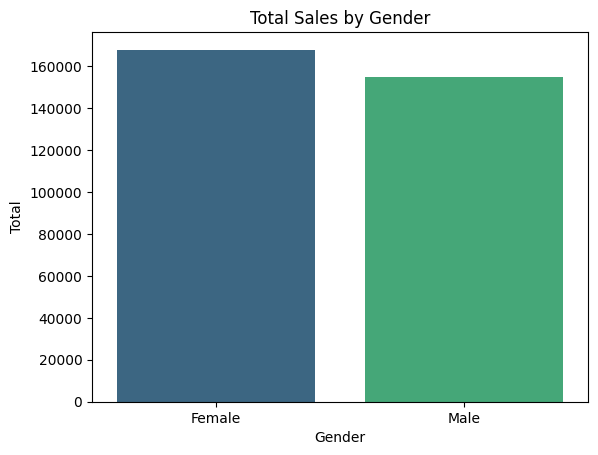

In [27]:
# Barplot
sns.barplot(data = df,
           y = 'Total',
           x = 'Gender',
           estimator = 'sum',
           palette='viridis',
           ci = None).set(title='Total Sales by Gender')
plt.show()

What are the Total Sales by Branch?

In [25]:
#calculate the total sales for each branch

sales_by_branch=df.groupby('Branch')['Total'].sum().reset_index()
sales_by_branch

,Branch,Total
0,A,106200.3705
1,B,106197.6720
2,C,110568.7065


C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_1820\3508318490.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




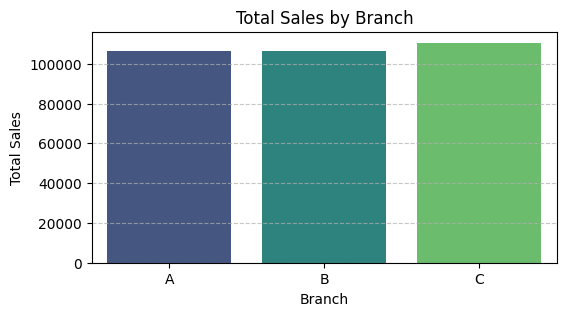

In [26]:
#visualize distribution of sales by branch using bar chart
#import matplotlib and seaborn

#creating  a bar chart

plt.figure(figsize=(6,3))
sns.barplot(data=sales_by_branch, x='Branch', y='Total', palette='viridis')

#giving the chart a title and add labels

plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# let display the chart

plt.show()

Sales across the branches show a close distribution between Branch A and Branch B, with Branch C outperforming the others by a noticeable margin

Which Product Lines Contribute Most to the Total Sales?

In [24]:
#calculating total sales by product line

sales_by_product_line = df.groupby('Product_Line')['Total'].sum().reset_index()
sales_by_product_line

,Product_Line,Total
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_1820\3652215542.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




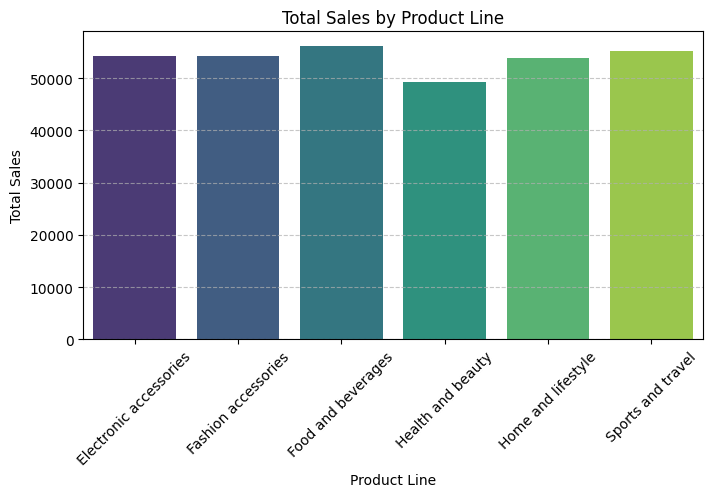

In [28]:
#create a bar chart to display the above output

plt.figure(figsize=(8,4))
sns.barplot(data=sales_by_product_line, x='Product_Line', y='Total', palette='viridis')

#give the chart a title and add labels

plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')

#further customization for bettr visibility

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#display the chart

plt.show()

The product line Food and Beverages contributes the most to total sales with 56,144.84, followed closely by Electronic Accessories with 54,337.53 and Fashion Accessories with 54,305.90. Health and Beauty has the lowest contribution among the top lines at 49,193.74.



How Do the Sales Vary By Day of the Week?

In [29]:
#convert Date column to datetime data type for better analysis 
df['Date'] = pd.to_datetime(df['Date'])

#extract day of the week from the Date column

df['Day_of_Week'] = df['Date'].dt.day_name()

#first five rows of updated dataset
df.head(5)

,Invoice ID,Branch,City,Customer_Type,Gender,Product_Line,Unit-Price,Quantity,Tax_5%,Total,Date,Time,Payment,COGS,Gross_Margin_Percentage,Gross Income,Rating,Day_of_Week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday


In [30]:
#calculate sales by day of week and sort them by day from Monday to Sunday

sales_by_day = df.groupby('Day_of_Week')['Total'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()
sales_by_day

,Day_of_Week,Total
0,Monday,37899.0780
1,Tuesday,51482.2455
2,Wednesday,43731.1350
3,Thursday,45349.2480
4,Friday,43926.3405
5,Saturday,56120.8095
6,Sunday,44457.8925


C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_1820\2163901032.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




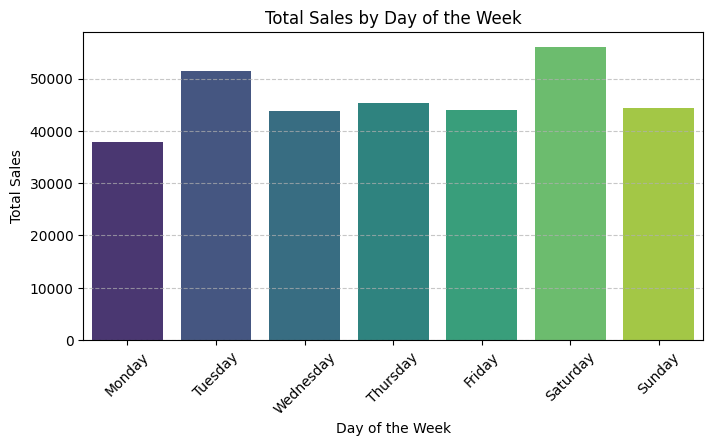

In [31]:
#ploting the above findings in a chart

plt.figure(figsize=(8,4))

sns.barplot(x='Day_of_Week', y='Total', data=sales_by_day, palette='viridis')

#giving the chart a title and label the axis

plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')

#further customize the chart for better visibility

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--',alpha=0.7)

#display the chart

plt.show()

Sales vary significantly by day of the week, with Saturday generating the highest revenue at approximately 56,121, while Monday has the lowest at around 37,899. Tuesday and Saturday are the top performers, while Wednesday, Thursday, and Friday show relatively similar sales figures. Overall, the weekend days, especially Saturday, contribute the most to total sales.


